# Data Immersion Task 6.4

# Contents

1. Import libraries
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis

# 1.  Import data libraries

In [1]:
#Import data libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Make sure matplotlib visuals will appear in notebook

%matplotlib inline

In [3]:
#Define path

path = r'C:\Users\avamk\Happiness Report Analysis'

In [4]:
#Import World Happiness Report data for 2019

df_2019 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'WHR_2019_checked.csv'))

In [5]:
#Create a subset of the 2019 data to include only 6 key variables and the Happiness Score

df_19sub = df_2019[['Happiness Score', 'Economy (GDP per Capita)', 'Social Support', 'Health (Life Expectancy)', 'Freedom', 'Perception of Corruption', 'Generosity']]

# 2. Data cleaning

In [6]:
#Check for missing values

df_19sub.isnull().sum()

Happiness Score             0
Economy (GDP per Capita)    0
Social Support              0
Health (Life Expectancy)    0
Freedom                     0
Perception of Corruption    0
Generosity                  0
dtype: int64

No missing values were found.

In [7]:
#Check for duplicates

df_dups_19 = df_19sub[df_19sub.duplicated()]

In [8]:
df_dups_19

,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom,Perception of Corruption,Generosity


No duplicates found.

# 3. Data prep for regression analysis

Hypothesis: If a country has a stable economy, strong social support, and long life expectancy, they will have a higher Happiness Score. I chose to focus on Economy (GDP per Capita because it had the strongest correlation with Happiness Score every year (2015-2019). I will be using the 2019 dataset because it is the most recent.

<Axes: xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

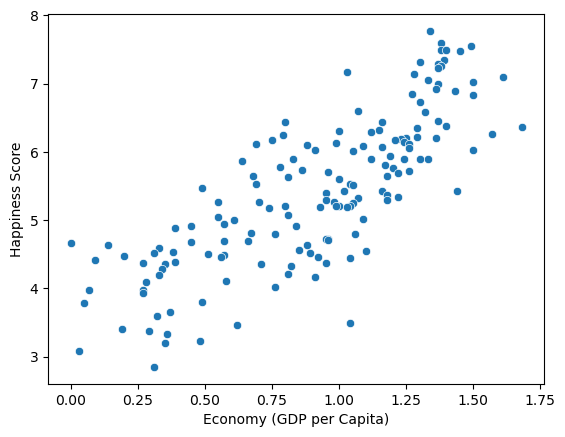

In [9]:
#Create a scatterplot to revisit variables from hypothesis. 

sns.scatterplot(x = 'Economy (GDP per Capita)', y = 'Happiness Score',data = df_19sub)

In [10]:
#Reshape the variables we need into numpy arrays and put them into separate objects

X = df_19sub['Economy (GDP per Capita)'].values.reshape(-1,1)
y = df_19sub['Happiness Score'].values.reshape(-1,1)

In [11]:
X

array([[1.34],
       [1.38],
       [1.49],
       [1.38],
       [1.4 ],
       [1.45],
       [1.39],
       [1.3 ],
       [1.37],
       [1.38],
       [1.37],
       [1.03],
       [1.28],
       [1.61],
       [1.33],
       [1.5 ],
       [1.37],
       [1.36],
       [1.43],
       [1.27],
       [1.5 ],
       [1.3 ],
       [1.07],
       [1.32],
       [1.37],
       [1.16],
       [0.8 ],
       [1.4 ],
       [1.68],
       [1.29],
       [1.15],
       [1.  ],
       [1.12],
       [1.57],
       [0.79],
       [1.29],
       [1.36],
       [1.25],
       [1.23],
       [1.21],
       [0.75],
       [1.24],
       [0.99],
       [1.26],
       [0.69],
       [0.88],
       [1.09],
       [1.16],
       [1.26],
       [0.91],
       [1.5 ],
       [1.05],
       [1.19],
       [1.3 ],
       [1.24],
       [0.83],
       [1.12],
       [1.33],
       [0.64],
       [1.17],
       [0.78],
       [1.2 ],
       [0.86],
       [1.26],
       [0.96],
       [1.22],
       [0.

In [12]:
y

array([[7.77],
       [7.6 ],
       [7.55],
       [7.49],
       [7.49],
       [7.48],
       [7.34],
       [7.31],
       [7.28],
       [7.25],
       [7.23],
       [7.17],
       [7.14],
       [7.09],
       [7.05],
       [7.02],
       [6.99],
       [6.92],
       [6.89],
       [6.85],
       [6.83],
       [6.73],
       [6.6 ],
       [6.59],
       [6.45],
       [6.44],
       [6.44],
       [6.38],
       [6.37],
       [6.35],
       [6.32],
       [6.3 ],
       [6.29],
       [6.26],
       [6.25],
       [6.22],
       [6.2 ],
       [6.2 ],
       [6.19],
       [6.18],
       [6.17],
       [6.15],
       [6.13],
       [6.12],
       [6.11],
       [6.1 ],
       [6.09],
       [6.07],
       [6.05],
       [6.03],
       [6.02],
       [6.01],
       [5.94],
       [5.9 ],
       [5.89],
       [5.89],
       [5.89],
       [5.89],
       [5.86],
       [5.81],
       [5.78],
       [5.76],
       [5.74],
       [5.72],
       [5.7 ],
       [5.69],
       [5.

In [13]:
#Split data into train set and test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# 4. Regression analysis

In [14]:
#Create a regression object

regression = LinearRegression()

In [15]:
#Fit the regression to the train set

regression.fit(X_train, y_train)

LinearRegression()

In [16]:
#Predict the values of y using X

y_predicted = regression.predict(X_test)

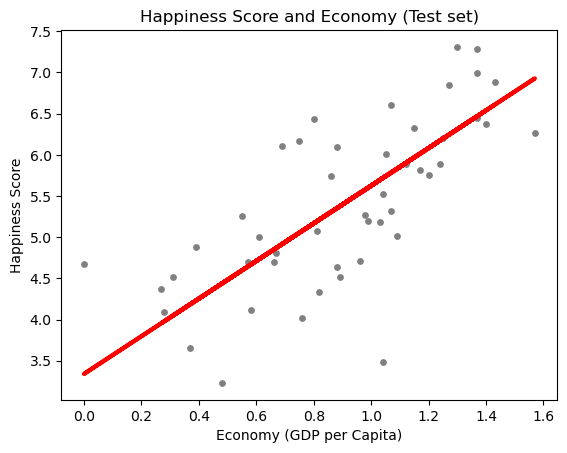

In [17]:
#Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Happiness Score and Economy (Test set)')
plot_test.xlabel('Economy (GDP per Capita)')
plot_test.ylabel('Happiness Score')
plot_test.show()

I think the line fits very well in the data plot. It seems to go right through the middle of the data points.

In [18]:
#Create objects that contain model summary statistics

rmse = mean_squared_error(y_test, y_predicted)

In [19]:
r2 = r2_score(y_test, y_predicted)

In [20]:
#Check accuracy of the model

print('Slope: ',regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope:  [[2.28580716]]
Mean squared error:  0.51836282039144
R2 score:  0.4909896061639515


In [21]:
#Create a dataframe comparing the real and the predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})

In [22]:
data.head(30)

,Actual,Predicted
0,6.44,5.167814
1,5.89,6.173570
2,6.20,6.196428
3,4.64,5.350679
4,6.45,6.470725
5,7.31,6.310718
6,6.10,5.350679
7,4.71,5.533544
8,4.11,4.664937
9,6.17,5.053524


I think that overall the model performed well on the test set. When looking at the summary statistics, the slope shows that the variables have a positive relationship with one another. When looking at the MSE, it is relatively small which means that the model should be accurate. The R2 score was pretty much in the middle of 0 and 1 so in that regard it's not really a poor fit or strong fit. Comparing the real and predicted values was interesting. I would say most values were close to one another, but there were a few that had a pretty big difference. When thinking of the hypothesis, I think that this model could prove it is correct but further analysis would have to be conducted to be certain. Although this regression model did well, I don't think it is as accurate as it could be due to some of the variance.